# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент Стеклов М. А. БФИ2001
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [2]:
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, pi

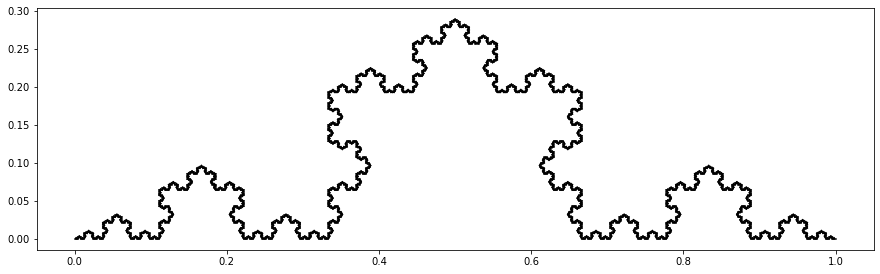

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
cos60 = cos(pi / 3)
sin60 = sin(pi / 3)
def koch_curve(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    vx, vy = x2 - x1, y2 - y1
    l1_x1, l1_y1 = x1, y1
    l1_x2, l1_y2 = vx/3 + l1_x1, vy/3 + l1_y1
    l2_x1, l2_y1 = l1_x2, l1_y2
    l2_x2 = (vx*cos60 - vy*sin60)/3 + l2_x1
    l2_y2 = (vx*sin60 + vy*cos60)/3 + l2_y1
    l3_x1, l3_y1 = l2_x2, l2_y2
    l3_x2, l3_y2 = vx*2/3 + l1_x1, vy*2/3 + l1_y1
    l4_x1, l4_y1 = l3_x2, l3_y2
    l4_x2, l4_y2 = x2, y2
    if depth == 1:
        plt.plot([l1_x1, l1_x2], [l1_y1, l1_y2], [l2_x1, l2_x2], [l2_y1, l2_y2],
                 [l3_x1, l3_x2], [l3_y1, l3_y2], [l4_x1, l4_x2], [l4_y1, l4_y2], marker='', color='k')
    else:
        koch_curve(depth - 1, l1_x1, l1_y1, l1_x2, l1_y2)
        koch_curve(depth - 1, l2_x1, l2_y1, l2_x2, l2_y2)
        koch_curve(depth - 1, l3_x1, l3_y1, l3_x2, l3_y2)
        koch_curve(depth - 1, l4_x1, l4_y1, l4_x2, l4_y2)

koch_curve(6, 0, 0, 1, 0)
    
    
    

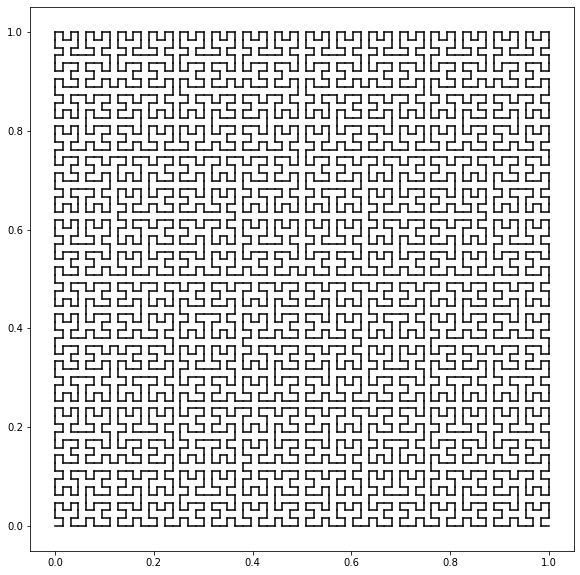

In [4]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

def hilbert_curve(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    if depth == 1: 
        vx, vy = x2 - x1, y2 - y1
        l1_x1, l1_y1 = x1, y1
        l1_x2, l1_y2 = - vy + x1, vx + y1
        l2_x1, l2_y1 = l1_x2, l1_y2
        l2_x2, l2_y2 = vx + l2_x1, vy + l2_y1
        l3_x1, l3_y1 = l2_x2, l2_y2
        l3_x2, l3_y2 = x2, y2
        plt.plot([l1_x1, l1_x2], [l1_y1, l1_y2], [l2_x1, l2_x2], [l2_y1, l2_y2],
                 [l3_x1, l3_x2], [l3_y1, l3_y2], marker='', color='k')
    else:
        twopowdmo = 2 ** (depth - 1)
        t = 1 / (2 * twopowdmo - 1)
        k1 = (twopowdmo - 1) * t
        k2 = twopowdmo * t
        vx, vy = x2 - x1, y2 - y1
        f1_x1, f1_y1 = - vy * k1 + x1, vx * k1 + y1
        f1_x2, f1_y2 = x1, y1
        f2_x1, f2_y1 = - vy * k2 + x1, vx * k2 + y1
        f2_x2, f2_y2 = vx * k1 + f2_x1, vy * k1 + f2_y1
        f3_x1, f3_y1 = vx * k2 + f2_x1, vy * k2 + f2_y1
        f3_x2, f3_y2 = f2_x1 + vx, f2_y1 + vy
        f4_x1, f4_y1 = x2, y2
        f4_x2, f4_y2 = vx + f1_x1, vy + f1_y1
        hilbert_curve(depth - 1, f1_x1, f1_y1, f1_x2, f1_y2)
        hilbert_curve(depth - 1, f2_x1, f2_y1, f2_x2, f2_y2)
        hilbert_curve(depth - 1, f3_x1, f3_y1, f3_x2, f3_y2)
        hilbert_curve(depth - 1, f4_x1, f4_y1, f4_x2, f4_y2)
        plt.plot([f1_x1, f2_x1], [f1_y1, f2_y1], [f2_x2, f3_x1], [f2_y2, f3_y1],
                 [f3_x2, f4_x2], [f3_y2, f4_y2], marker='', color='k')
hilbert_curve(6, 0,0,1,0)
    

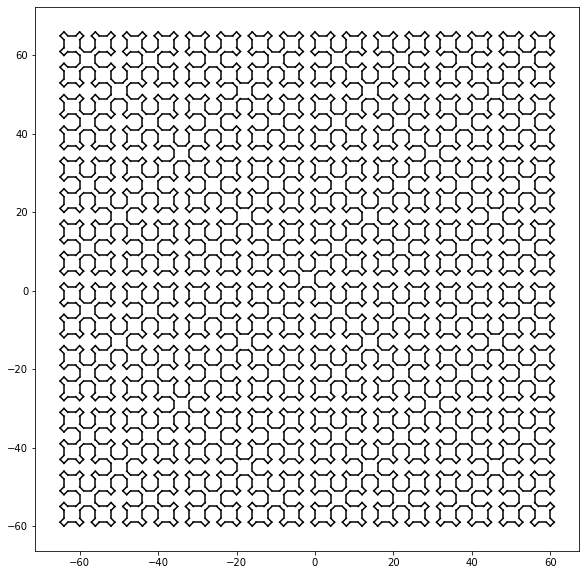

In [150]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

sqrt2 = sqrt(2)
cos45 = sqrt2 / 2
sin45 = cos45
cos135 = -cos45
sin135 = sin45

def serpintsky_curve(depth: int, x1: float, y1: float, x2: float, y2: float,
                     drop_line: bool = False, first=False):
    assert depth >= 0, "Depth must be bigger then 0"
    if depth == 0:
        vx, vy = x2 - x1, y2 - y1
        l1_x1, l1_y1 = x1, y1
        l1_x2, l1_y2 = - vy + x1, vx + y1
        l2_x1, l2_y1 = l1_x2, l1_y2
        l2_x2, l2_y2 = vx + l2_x1, vy + l2_y1
        l3_x1, l3_y1 = l2_x2, l2_y2
        l3_x2, l3_y2 = x2, y2
        if not drop_line:
            plt.plot([l1_x1, l1_x2], [l1_y1, l1_y2], [l2_x1, l2_x2], [l2_y1, l2_y2],
                     [l3_x1, l3_x2], [l3_y1, l3_y2], marker='', color='k')
        else:
            plt.plot([l1_x1, l1_x2], [l1_y1, l1_y2],
                     [l3_x1, l3_x2], [l3_y1, l3_y2], marker='', color='k')
    else:
        vx, vy = x2 - x1, y2 - y1
        vl = sqrt(vx**2 + vy**2)
        vertl = vl * 2 / sqrt2
        f1_x2, f1_y2 = - vy + x1, vx + y1
        f1_x1, f1_y1 = f1_x2 + vx, f1_y2 + vy
        f2_x2 = vertl * (vx*cos45 - vy*sin45) / vl + f1_x1
        f2_y2 = vertl * (vx*sin45 + vy*cos45) / vl + f1_y1
        f2_x1, f2_y1 = - vy + f2_x2, vx + f2_y2
        f3_x2 = vertl * (vx*cos135 - vy*sin135) / vl + f2_x1
        f3_y2 = vertl * (vx*sin135 + vy*cos135) / vl + f2_y1
        f3_x1, f3_y1 = f3_x2 - vx, f3_y2 - vy
        f4_x1 = vertl * (vx*cos135 - vy*sin135) / vl + f1_x2
        f4_y1 = vertl * (vx*sin135 + vy*cos135) / vl + f1_y2
        f4_x2, f4_y2 = - vy + f4_x1, vx + f4_y1
        plt.plot([f1_x1, f2_x2], [f1_y1, f2_y2],
                 [f2_x1, f3_x2], [f2_y1, f3_y2],
                 [f1_x2, f4_x1], [f1_y2, f4_y1],
                 [f3_x1, f4_x2], [f3_y1, f4_y2], marker='', color='k')
        fig_len = (2*vl + 2 * vertl/sqrt2)
        half_count = max(0, (2 ** (depth - 2)) -1)
        half_len = half_count * fig_len
        if first and depth > 1:
            l1_x1 = f1_x2 - (- vy / vl) * ((1 + half_count * 2) * fig_len + vl)
            l1_y1 = f1_y2 - (vx / vl) * ((1 + half_count * 2) * fig_len + vl)
            l1_x2 = f1_x1 - (- vy / vl) * ((1 + half_count * 2) * fig_len + vl)
            l1_y2 = f1_y1 - (vx / vl) * ((1 + half_count * 2) * fig_len + vl)
            plt.plot([l1_x1, l1_x2], [l1_y1, l1_y2], marker='', color='k')
        f1_x1 -= half_len * (-vy) / vl
        f1_y1 -= half_len * (vx) / vl
        f1_x2 -= half_len * (-vy) / vl
        f1_y2 -= half_len * (vx) / vl
        f3_x1 += half_len * (-vy) / vl
        f3_y1 += half_len * (vx) / vl
        f3_x2 += half_len * (-vy) / vl
        f3_y2 += half_len * (vx) / vl
        f2_x1 += half_len * vx / vl
        f2_y1 += half_len * vy / vl
        f2_x2 += half_len * vx / vl
        f2_y2 += half_len * vy / vl
        f4_x1 -= half_len * vx / vl
        f4_y1 -= half_len * vy / vl
        f4_x2 -= half_len * vx / vl
        f4_y2 -= half_len * vy / vl
        serpintsky_curve(depth - 1, f1_x1, f1_y1, f1_x2, f1_y2,
                         drop_line=not (depth == 1 and first))
        serpintsky_curve(depth - 1, f2_x1, f2_y1, f2_x2, f2_y2)
        serpintsky_curve(depth - 1, f3_x1, f3_y1, f3_x2, f3_y2, drop_line=drop_line)
        serpintsky_curve(depth - 1, f4_x1, f4_y1, f4_x2, f4_y2)
        
        
        
        
serpintsky_curve(5, 0, 0, 1, 1, first=True)

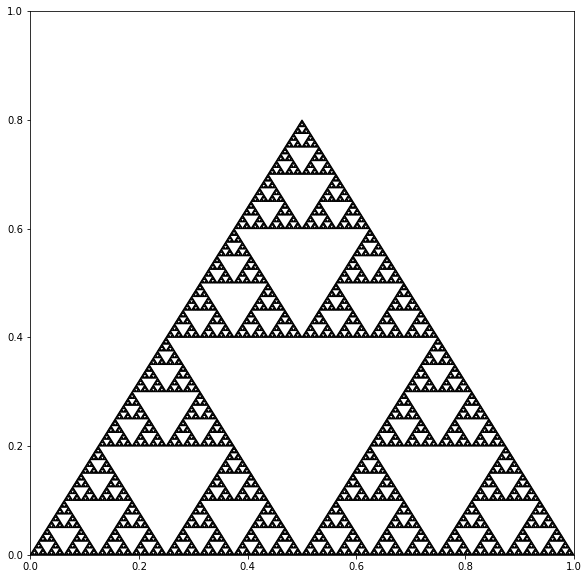

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
def serpintsky_triangle(depth: int, x1: float, y1: float, x2: float, y2: float,
                       x3: float, y3: float):
    
    assert depth >= 1, "Depth must be bigger then 0"
    if depth == 1:
        plt.gca().add_patch(plt.Polygon([[x1, y1], [x2, y2], [x3, y3]], color='k')) 
    else:
        f1_x1, f1_y1 = x1, y1
        f1_x2, f1_y2 = (x2 - x1) / 2 + x1, (y2 - y1) / 2 + y1
        f1_x3, f1_y3 = (x3 - x1) / 2 + x1, (y3 - y1) / 2 + y1
        f2_x2, f2_y2 = x2, y2
        f2_x1, f2_y1 = f1_x2, f2_y2
        f2_x3, f2_y3 = (x3 - x2) / 2 + x2, (y3 - y2) / 2 + y2
        f3_x1, f3_y1 = f1_x3, f1_y3
        f3_x2, f3_y2 = f2_x3, f2_y3
        f3_x3, f3_y3 = x3, y3
        serpintsky_triangle(depth - 1, f1_x1, f1_y1, f1_x2, f1_y2, f1_x3, f1_y3)
        serpintsky_triangle(depth - 1, f2_x1, f2_y1, f2_x2, f2_y2, f2_x3, f2_y3)
        serpintsky_triangle(depth - 1, f3_x1, f3_y1, f3_x2, f3_y2, f3_x3, f3_y3)
        
serpintsky_triangle(9, 0, 0, 1, 0, 0.5, 0.8)
    

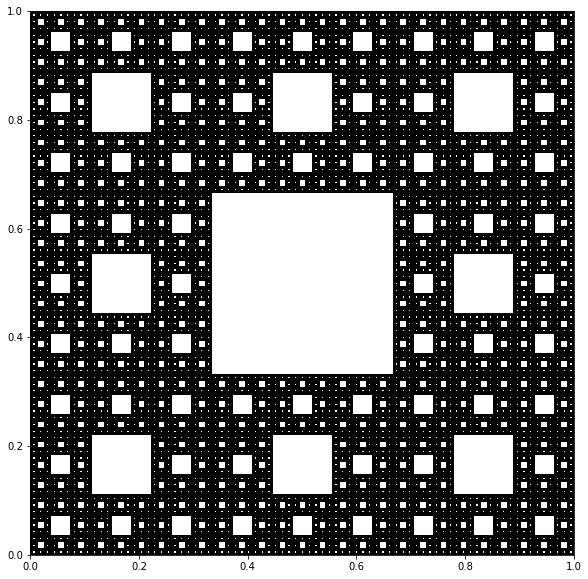

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
def serpintsky_square(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    if depth == 1:
        vx, vy = x2 - x1, y2 - y1
        x3, y3 = -vy + x2, vx + y2
        x4, y4 = -vy + x1, vx + y1
        plt.gca().add_patch(plt.Polygon([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], color='k')) 
    else:
        vx, vy = x2 - x1, y2 - y1
        upx, upy = - vy / 3, vx / 3
        f1_x1, f1_y1 = x1, y1
        f1_x2, f1_y2 = vx / 3 + x1, vy / 3 + y1
        f2_x1, f2_y1 = f1_x2, f1_y2
        f2_x2, f2_y2 = 2 * vx / 3 + x1, 2 * vy / 3 + y1
        f3_x1, f3_y1 = f2_x2, f2_y2
        f3_x2, f3_y2 = x2, y2
        f4_x1, f4_y1 = f1_x1 + upx, f1_y1 + upy
        f4_x2, f4_y2 = f1_x2 + upx, f1_y2 + upy
        f5_x1, f5_y1 = f3_x1 + upx, f3_y1 + upy
        f5_x2, f5_y2 = f3_x2 + upx, f3_y2 + upy
        f6_x1, f6_y1 = f4_x1 + upx, f4_y1 + upy
        f6_x2, f6_y2 = f4_x2 + upx, f4_y2 + upy
        f7_x1, f7_y1 = f2_x1 + upx * 2, f2_y1 + upy * 2
        f7_x2, f7_y2 = f2_x2 + upx * 2, f2_y2 + upy * 2
        f8_x1, f8_y1 = f5_x1 + upx, f5_y1 + upy
        f8_x2, f8_y2 = f5_x2 + upx, f5_y2 + upy
        serpintsky_square(depth - 1, f1_x1, f1_y1, f1_x2, f1_y2)
        serpintsky_square(depth - 1, f2_x1, f2_y1, f2_x2, f2_y2)
        serpintsky_square(depth - 1, f3_x1, f3_y1, f3_x2, f3_y2)
        serpintsky_square(depth - 1, f4_x1, f4_y1, f4_x2, f4_y2)
        serpintsky_square(depth - 1, f5_x1, f5_y1, f5_x2, f5_y2)
        serpintsky_square(depth - 1, f6_x1, f6_y1, f6_x2, f6_y2)
        serpintsky_square(depth - 1, f7_x1, f7_y1, f7_x2, f7_y2)
        serpintsky_square(depth - 1, f8_x1, f8_y1, f8_x2, f8_y2)

serpintsky_square(6, 0, 0, 1, 0)

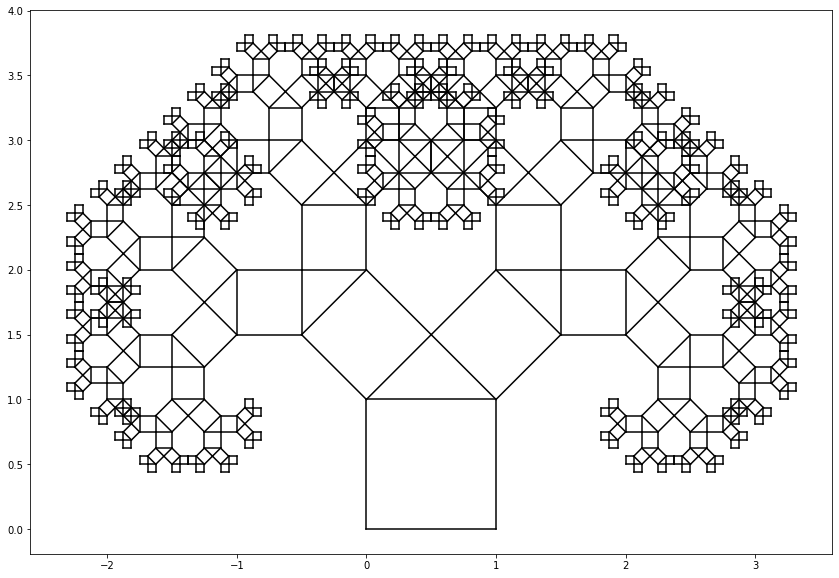

In [31]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
def pifagor_tree(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    vx, vy = x2 - x1, y2 - y1
    x3, y3 = -vy + x2, vx + y2
    x4, y4 = -vy + x1, vx + y1
    if depth == 1:
        plt.plot([x1, x2], [y1, y2], [x2, x3], [y2, y3],
                 [x3, x4], [y3, y4], [x4, x1], [y4, y1], marker='', color='k')
    else:
        f1_x1, f1_y1 = x4, y4
        f1_x2, f1_y2 = (vx - vy * 3) / 2 + x1, (vy + vx * 3) / 2 + y1
        f2_x1, f2_y1 = f1_x2, f1_y2
        f2_x2, f2_y2 = x3, y3
        pifagor_tree(depth - 1, f1_x1, f1_y1, f1_x2, f1_y2)
        pifagor_tree(depth - 1, f2_x1, f2_y1, f2_x2, f2_y2)
        pifagor_tree(1, x1, y1, x2, y2)

pifagor_tree(9, 0, 0, 1, 0)

### Вывод